In [52]:
import sys
sys.path.append('../MVR-Python3/')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from deap import algorithms, base, creator, tools

In [4]:
import code

In [3]:
ort10_coltar10 = pd.read_csv('ort10_coltar10_mean.csv', header=None).values
ort10_colfeat10 = pd.read_csv('ort10_colfeat10_mean.csv', header=None).values
ort20 = pd.read_csv('ort20_mean.csv', header=None).values
ort5_coltar10_colfeat5 = pd.read_csv('ort5_coltar10_colfeat5_mean.csv', header=None).values
ort5_coltar15 = pd.read_csv('ort5_coltar15_mean.csv', header=None).values
ort10_coltar5_colfeat5 = pd.read_csv('ort10_coltar5_colfeat5_mean.csv', header=None).values
ort5_colfeat15 = pd.read_csv('ort5_colfeat15_mean.csv', header=None).values
ort15_colfeat5 = pd.read_csv('ort15_colfeat5_mean.csv', header=None).values
ort5_coltar5_colfeat10 = pd.read_csv('ort5_coltar5_colfeat10_mean.csv', header=None).values

ort10_coltar10_data = pd.read_csv('ort10_coltar10_data.csv', header=None)
ort10_colfeat10_data = pd.read_csv('ort10_colfeat10_data.csv', header=None)
ort20_data = pd.read_csv('ort20_data.csv', header=None)
ort5_coltar10_colfeat5_data = pd.read_csv('ort5_coltar10_colfeat5_data.csv', header=None)
ort5_coltar15_data = pd.read_csv('ort5_coltar15_data.csv', header=None)
ort10_coltar5_colfeat5_data = pd.read_csv('ort10_coltar5_colfeat5_data.csv', header=None)
ort5_colfeat15_data = pd.read_csv('ort5_colfeat15_data.csv', header=None)
ort15_colfeat5_data = pd.read_csv('ort15_colfeat5_data.csv', header=None)
ort5_coltar5_colfeat10_data = pd.read_csv('ort5_coltar5_colfeat10_data.csv', header=None)

In [6]:
true_results = [
    ort10_coltar10[:,-1],
    ort10_colfeat10[:,-1],
    ort20[:,-1],
    ort5_coltar10_colfeat5[:,-1],
    ort5_coltar15[:,-1],
    ort10_coltar5_colfeat5[:,-1],
    ort5_colfeat15[:,-1],
    ort15_colfeat5[:,-1],
    ort5_coltar5_colfeat10[:,-1]
]

In [14]:
datasets = [
    ort10_coltar10_data.values[:,-1],
    ort10_colfeat10_data.values[:,-1],
    ort20_data.values[:,-1],
    ort5_coltar10_colfeat5_data.values[:,-1],
    ort5_coltar15_data.values[:,-1],
    ort10_coltar5_colfeat5_data.values[:,-1],
    ort5_colfeat15_data.values[:,-1],
    ort15_colfeat5_data.values[:,-1],
    ort5_coltar5_colfeat10_data.values[:,-1]
]

In [15]:
datasets[0].shape

(1000,)

In [16]:
true_results[0].shape

(180,)

### Net build

In [100]:
functions = {
    #0: 'end',
    1: np.exp,
    2: np.log,
    3: 'add',
    4: np.negative,
    5: 'sub',
    #6: 'div',
}

In [101]:
def easyEvalCoeff(individual, i=1):
    x = np.arange(2, 2 + len(true_results[i]))
    
    outed = x
    for indiv in individual[::-1]:
        if indiv == 3:
            outed = 1 / outed
        elif indiv == 2:
            outed = functions[indiv](np.abs(outed))
        elif indiv == 5:
            outed = 1 - outed
        else:
            outed = functions[indiv](outed)

    
    loss = ((outed - true_results[i])**2).mean()
    return (loss,)

In [102]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [103]:
toolbox = base.Toolbox()
toolbox.register("attr_normal", np.random.randint, 1, 6)
toolbox.register(
    "individual", 
    tools.initRepeat, 
    creator.Individual, 
    toolbox.attr_normal, 
    n=11 # num coeffs
)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", easyEvalCoeff, i=1)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutUniformInt, low=1, up=5, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [104]:
pop = toolbox.population(n=300)
algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, verbose=False)
print(tools.selBest(pop, k=1))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()


[[5, 1, 5, 1, 1, 1, 4, 2, 5, 2, 5]]


In [105]:
def EasyGeneticCoeff(i, n=11):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)
    
    toolbox = base.Toolbox()
    toolbox.register("attr_normal", np.random.randint, 1, 6)
    toolbox.register(
        "individual", 
        tools.initRepeat, 
        creator.Individual, 
        toolbox.attr_normal, 
        n=n # num coeffs
    )
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", easyEvalCoeff, i=1)
    toolbox.register("mate", tools.cxOnePoint)
    toolbox.register("mutate", tools.mutUniformInt, low=1, up=5, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    pop = toolbox.population(n=1000)
    algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, verbose=False)
    return tools.selBest(pop, k=1)[0]

In [106]:
def out_print(individual):
    x = np.arange(2, 2 + len(true_results[i]))
    
    outed = x
    for indiv in individual[::-1]:
        if indiv == 3:
            outed = 1 / outed
        elif indiv == 2:
            outed = functions[indiv](np.abs(outed))
        elif indiv == 5:
            outed = 1 - outed
        else:
            outed = functions[indiv](outed)
            
    return outed

## Pipeline

### Calculations: i = 1

In [107]:
i = 1

In [108]:
coeffs = EasyGeneticCoeff(i)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


#### Visualization

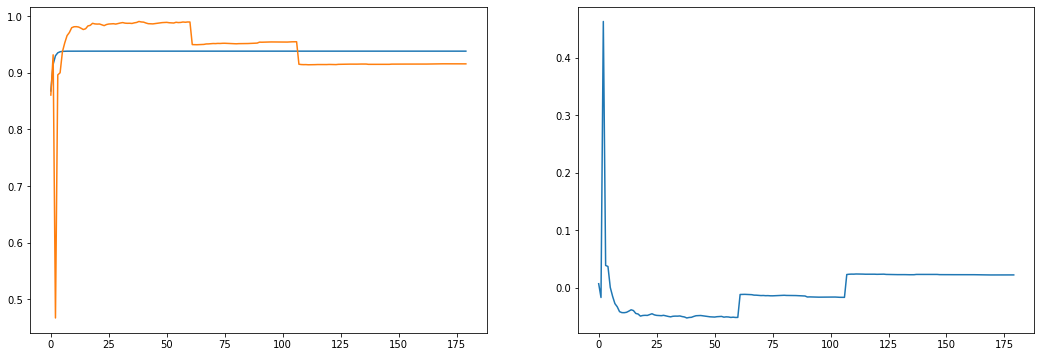

In [109]:
i = 1

fig = plt.figure(figsize=(18, 6))

ax = fig.add_subplot(121)
ax.plot(out_print(coeffs))
ax.plot(true_results[i])

ax = fig.add_subplot(122)
ax.plot(out_print(coeffs) - true_results[i])

#### Repeat

In [110]:
coeffs = EasyGeneticCoeff(i, n=5)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()


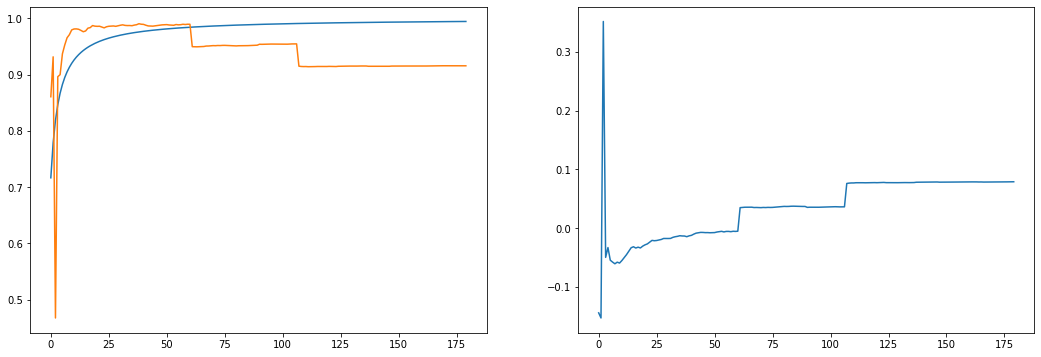

In [111]:
i = 1

fig = plt.figure(figsize=(18, 6))

ax = fig.add_subplot(121)
ax.plot(out_print(coeffs))
ax.plot(true_results[i])

ax = fig.add_subplot(122)
ax.plot(out_print(coeffs) - true_results[i])

### Calculations: i = 3

In [112]:
i = 3

In [113]:
coeffs = EasyGeneticCoeff(i)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


#### Visualization

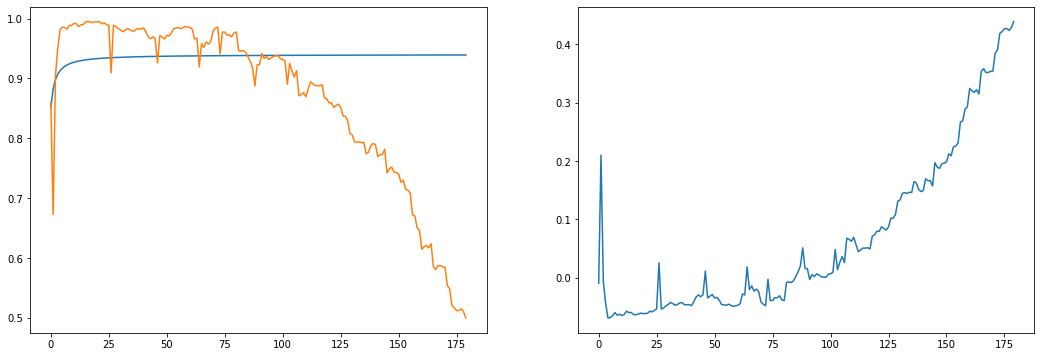

In [114]:
i = 3

fig = plt.figure(figsize=(18, 6))

ax = fig.add_subplot(121)
ax.plot(out_print(coeffs))
ax.plot(true_results[i])

ax = fig.add_subplot(122)
ax.plot(out_print(coeffs) - true_results[i])

#### Repeat

In [115]:
coeffs = EasyGeneticCoeff(i, n=5)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


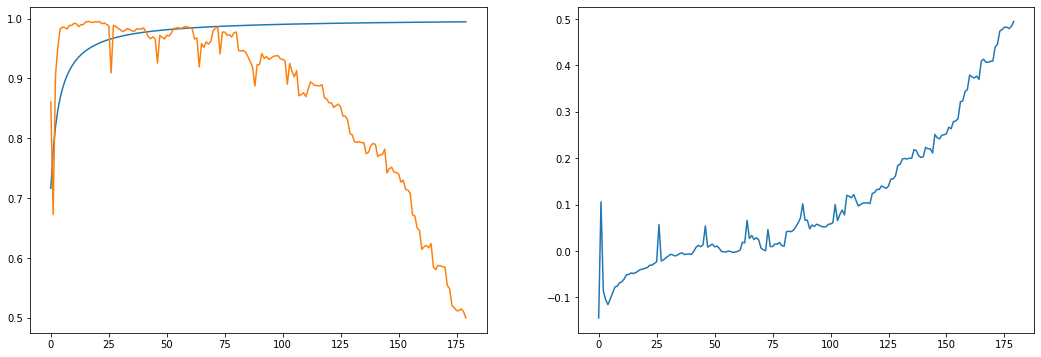

In [116]:
i = 3

fig = plt.figure(figsize=(18, 6))

ax = fig.add_subplot(121)
ax.plot(out_print(coeffs))
ax.plot(true_results[i])

ax = fig.add_subplot(122)
ax.plot(out_print(coeffs) - true_results[i])

#### Repeat

In [123]:
coeffs = EasyGeneticCoeff(i, n=4)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


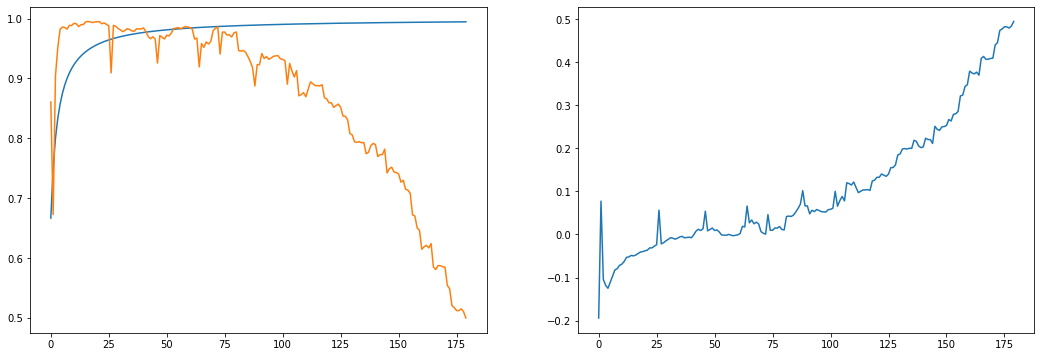

In [124]:
i = 3

fig = plt.figure(figsize=(18, 6))

ax = fig.add_subplot(121)
ax.plot(out_print(coeffs))
ax.plot(true_results[i])

ax = fig.add_subplot(122)
ax.plot(out_print(coeffs) - true_results[i])

### Calculations: i = 5

In [125]:
i = 5

In [126]:
coeffs = EasyGeneticCoeff(i)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


#### Visualization

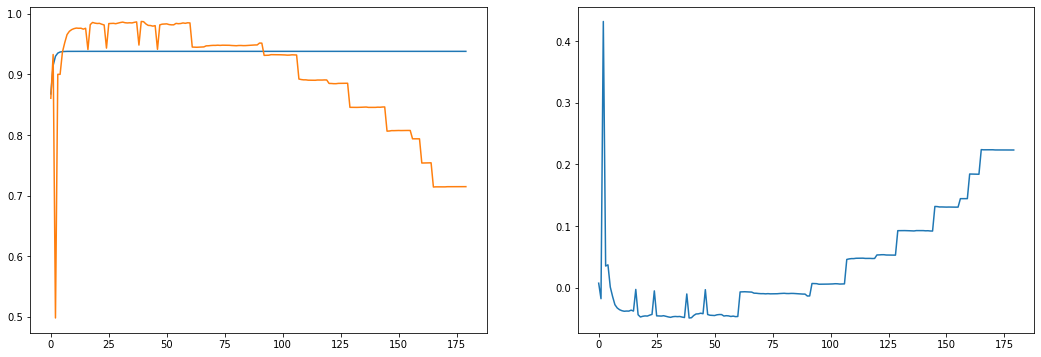

In [127]:
fig = plt.figure(figsize=(18, 6))

ax = fig.add_subplot(121)
ax.plot(out_print(coeffs))
ax.plot(true_results[i])

ax = fig.add_subplot(122)
ax.plot(out_print(coeffs) - true_results[i])

#### Repeat

In [128]:
coeffs = EasyGeneticCoeff(i, n=5)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


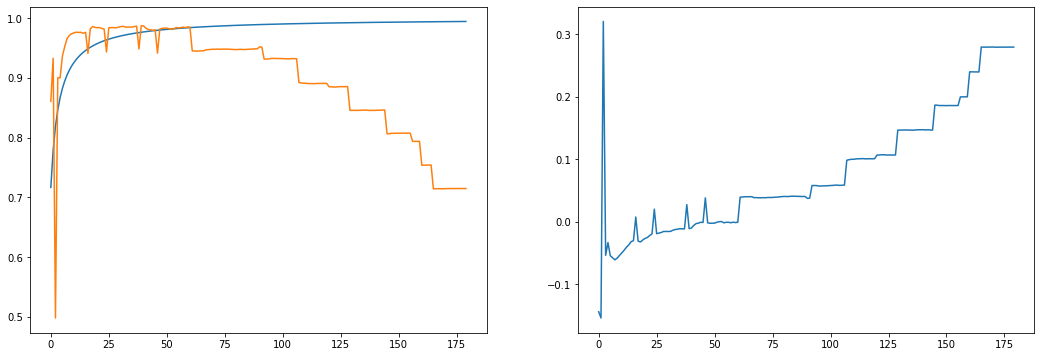

In [129]:
fig = plt.figure(figsize=(18, 6))

ax = fig.add_subplot(121)
ax.plot(out_print(coeffs))
ax.plot(true_results[i])

ax = fig.add_subplot(122)
ax.plot(out_print(coeffs) - true_results[i])

#### Repeat

In [130]:
coeffs = EasyGeneticCoeff(i, n=4)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


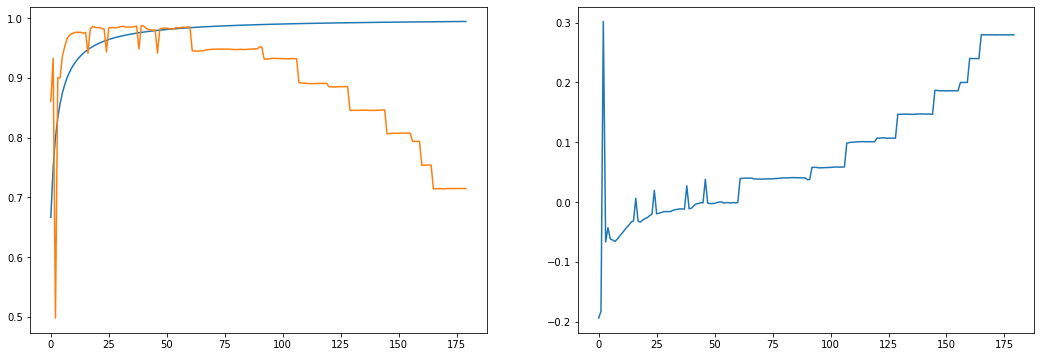

In [131]:
fig = plt.figure(figsize=(18, 6))

ax = fig.add_subplot(121)
ax.plot(out_print(coeffs))
ax.plot(true_results[i])

ax = fig.add_subplot(122)
ax.plot(out_print(coeffs) - true_results[i])

### Calculations: i = 7

In [132]:
i = 7

In [133]:
coeffs = EasyGeneticCoeff(i)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in true_divide
  import sys


#### Visualization

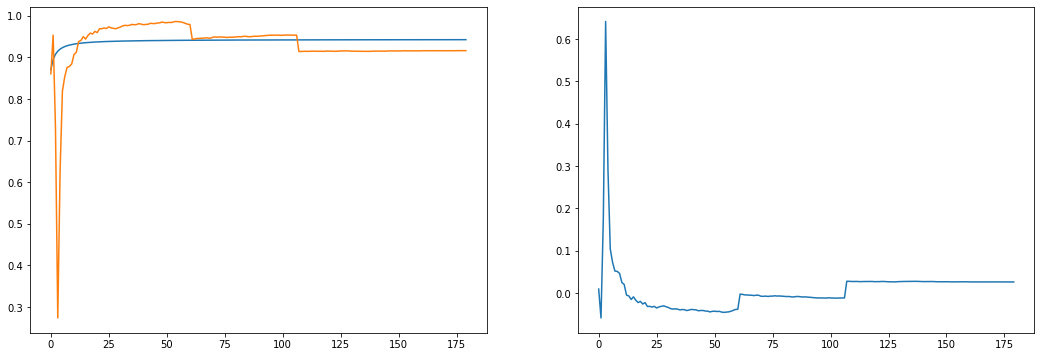

In [134]:
fig = plt.figure(figsize=(18, 6))

ax = fig.add_subplot(121)
ax.plot(out_print(coeffs))
ax.plot(true_results[i])

ax = fig.add_subplot(122)
ax.plot(out_print(coeffs) - true_results[i])

#### Repeat

In [135]:
coeffs = EasyGeneticCoeff(i, n=5)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


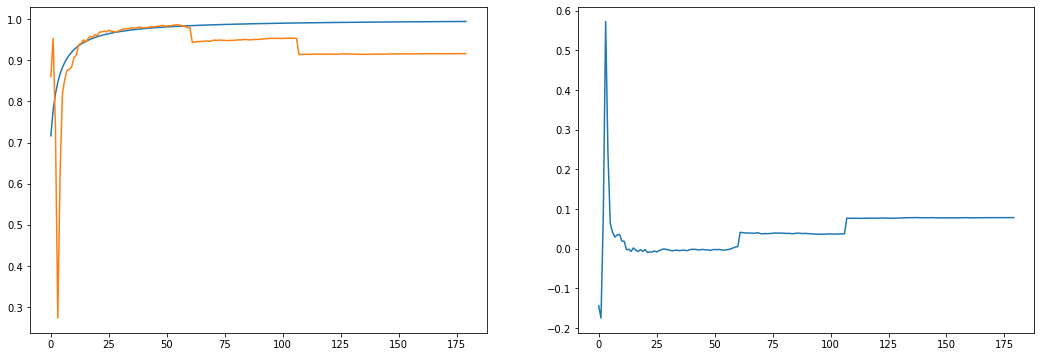

In [136]:
fig = plt.figure(figsize=(18, 6))

ax = fig.add_subplot(121)
ax.plot(out_print(coeffs))
ax.plot(true_results[i])

ax = fig.add_subplot(122)
ax.plot(out_print(coeffs) - true_results[i])